In [3]:
# Import dependencies
import pandas as pd
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline 

In [5]:
# Set data directory path
DATA_PATH = './data/preprocessed/'

In [6]:
# Get files listed in DATA_PATH
files = sorted(os.listdir(DATA_PATH))
files

['CourseSelection_Dataset.xlsx',
 'MergedData.xlsx',
 'Preprocessed_Batches.xlsx',
 'Preprocessed_MergedData.xlsx',
 'TotalCoursePopularity.xlsx',
 'preprocessed_individual_batches']

In [7]:
df = pd.read_excel(DATA_PATH + 'Preprocessed_MergedData.xlsx')
df.head()

Roll No Batch / Term Code Course Code                             Course  \
0  Student 1        Semester 5      CSE535                   Mobile Computing   
1  Student 1        Semester 3    COM201-1                   Critical Reading   
2  Student 1        Semester 6      CSE546               Applied Cryptography   
3  Student 1        Semester 5      CSE300              Software Engineering    
4  Student 1        Semester 4      CSE222  Analysis and Design of Algorithms   

   Credit Grade   SPI   CPI    Batch      Student-Batch  
0       4     B  9.17  9.23  Batch 1  Student 1 Batch 1  
1       2    A-  9.67  9.27  Batch 1  Student 1 Batch 1  
2       4     A  8.80  9.16  Batch 1  Student 1 Batch 1  
3       4    A-  9.17  9.23  Batch 1  Student 1 Batch 1  
4       4     B  9.20  9.25  Batch 1  Student 1 Batch 1

# Number of Unique:

### 1. Students:

In [8]:
print('Total number of unique students in dataset:', len(df['Student-Batch'].unique()))

Total number of unique students in dataset: 723


### 2. Courses:

In [10]:
print('Total number of unique courses in dataset:', len(df['Course Code'].unique()))

Total number of unique courses in dataset: 285


### 3. Courses with Credit value 'x':

In [8]:
unique_courses = df['Course Code'].unique()
credits_unqiue = defaultdict(int)
for c in unique_courses:
    val = df.loc[df['Course Code'] == c]['Credit'].unique()[0]
    credits_unqiue[val] += 1

for k in sorted(credits_unqiue):
    print(f'Number of courses with credit value {k}: {credits_unqiue[k]}')

Number of courses with credit value 1: 6
Number of courses with credit value 2: 45
Number of courses with credit value 3: 1
Number of courses with credit value 4: 230
Number of courses with credit value 6: 1
Number of courses with credit value 8: 1
Number of courses with credit value 12: 1


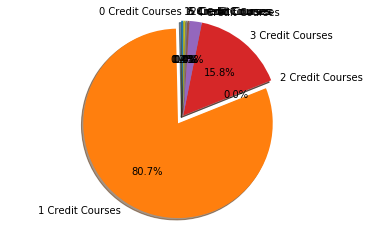

In [21]:
sizes = []
labels = []
for k in sorted(credits_unqiue):
    labels.append(f'{k} Credit Courses')
    sizes.append(credits_unqiue[k])

indx = np.argmax(sizes)
explode = np.zeros(len(sizes))
explode[indx] = 0.1
explode = tuple(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 4. Batches:

In [5]:
batch_names = df['Batch'].unique()
batch_names

array(['Batch 1', 'Batch 2', 'Batch 3', 'Batch 4', 'Batch 5', 'Batch 6',
       'Batch 7'], dtype=object)

### 5. Datapoints / Transactions:

In [7]:
opted_batches = pd.read_excel(DATA_PATH + 'CourseSelection_Dataset.xlsx')
print(f'Number of unique datapoints {len(opted_batches)}')
print(f'Number of unique datapoints {len(opted_batches.drop_duplicates())}')

Number of unique datapoints 5401
Number of unique datapoints 4556


# Yearwise Popularity of selected Courses

In [6]:
xls = pd.ExcelFile(DATA_PATH + 'Preprocessed_Batches.xlsx')
batches_df = []
for batch_name in batch_names:
    batches_df.append(pd.read_excel(xls, batch_name))

In [20]:
batch_years = []
# Traverse over all the Batches in college
for batch_no, batch in enumerate(batches_df):
    # Years reperesents all the years of the current batch, None if the batch didnt exist in that year 
    years = [None for _ in range(batch_no)]
    
    # Group the batch semesterwise
    grp = batch.groupby('Batch / Term Code')
    
    i = 0
    year_df = None
    
    # Traverse over the group to get the semester's dataframe one by one
    for name, g in grp:
        # if it is a winter semester (1,3,5,...) 
        if i % 2 == 0:
            year_df = g
        # if it is a monsoon semester (2,4,6,...), append with the winter sem and make one year.
        else:
            year_df = year_df.append(g, ignore_index=True)
            years.append(year_df)
            
        i += 1
        
    # Append the Batch years into the List of all the batches' years 
    batch_years.append(years)

In [24]:
# Get the total years for which the college has existed from Batch 1 to 7
total_years = len(batch_years[-1])
total_years

10

In [25]:
# Stores the courses that were offered in that year for all the possible batch semesters in that year
yearwise_courses_offered = []

# For each college year
for y in range(total_years):
    year_df = None
    
    # Iterate over all the batches that existed in that year in college
    for b in range(len(batch_years)):
        if y >= len(batch_years[b]):
            continue
        if year_df is None:
            year_df = batch_years[b][y].copy()
        else:
            year_df = year_df.append(batch_years[b][y], ignore_index=True)
    
    # Add the year batches appended list
    yearwise_courses_offered.append(year_df)

In [121]:
yearwise_courses_offered[1]

Roll No Batch / Term Code Course Code  \
0      Student 1        Semester 3    COM201-1   
1      Student 1        Semester 3      CSE231   
2      Student 1        Semester 3      CSE201   
3      Student 1        Semester 3      MTH201   
4      Student 1        Semester 3      ESC201   
5      Student 2        Semester 3      CSE201   
6      Student 2        Semester 3      MTH201   
7      Student 2        Semester 3    COM201-1   
8      Student 2        Semester 3      CSE231   
9      Student 2        Semester 3      ESC201   
10     Student 4        Semester 3      CSE201   
11     Student 4        Semester 3    COM201-1   
12     Student 4        Semester 3      MTH201   
13     Student 4        Semester 3      CSE231   
14     Student 4        Semester 3      ESC201   
15     Student 5        Semester 3      ESC201   
16     Student 5        Semester 3      MTH201   
17     Student 5        Semester 3    COM201-1   
18     Student 5        Semester 3      CSE201   
19     Student 5        Semester 3      CSE231   
20     Student 6        Semester 3    COM201-1   
21     Student 6        Semester 3      ESC201   
22     Student 6        Semester 3      CSE201   
23     Student 6        Semester 3      MTH201   
24     Student 6        Semester 3      CSE231   
25     Student 7        Semester 3    COM201-1   
26     Student 7        Semester 3      CSE231   
27     Student 7        Semester 3      MTH201   
28     Student 7        Semester 3      ESC201   
29     Student 7        Semester 3      CSE201   
...          ...               ...         ...   
1024  Student 64        Semester 2     HSS101*   
1025  Student 64        Semester 2     CSE122*   
1026  Student 64        Semester 2   CSE131-1*   
1027  Student 64        Semester 2      CSE102   
1028  Student 64        Semester 2      CSE112   
1029  Student 65        Semester 2     HSS201*   
1030  Student 65        Semester 2   CSE131-1*   
1031  Student 65        Semester 2      CSE102   
1032  Student 65        Semester 2      CSE112   
1033  Student 65        Semester 2     CSE122*   
1034  Student 66        Semester 2      CSE102   
1035  Student 66        Semester 2      CSE112   
1036  Student 66        Semester 2     HSS101*   
1037  Student 66        Semester 2     CSE122*   
1038  Student 66        Semester 2   CSE131-1*   
1039  Student 67        Semester 2     CSE122*   
1040  Student 67        Semester 2   CSE131-1*   
1041  Student 67        Semester 2      CSE102   
1042  Student 67        Semester 2      CSE112   
1043  Student 67        Semester 2     HSS202*   
1044  Student 68        Semester 2     CSE122*   
1045  Student 68        Semester 2     HSS101*   
1046  Student 68        Semester 2      CSE112   
1047  Student 68        Semester 2      CSE102   
1048  Student 68        Semester 2   CSE131-1*   
1049  Student 69        Semester 2     HSS201*   
1050  Student 69        Semester 2   CSE131-1*   
1051  Student 69        Semester 2     CSE122*   
1052  Student 69        Semester 2      CSE102   
1053  Student 69        Semester 2      CSE112   

                                  Course  Credit Grade   SPI   CPI    Batch  \
0                       Critical Reading       2    A-  9.67  9.27  Batch 1   
1                     Operating Systems        4     A  9.67  9.27  Batch 1   
2                   Advanced Programming       4    A+  9.67  9.27  Batch 1   
3            Probability and Statistics        4    A-  9.67  9.27  Batch 1   
4     Transducer And Signal Conditioning       4     A  9.67  9.27  Batch 1   
5                   Advanced Programming       4     C  6.00  5.54  Batch 1   
6            Probability and Statistics        4     C  6.00  5.54  Batch 1   
7                       Critical Reading       2     C  6.00  5.54  Batch 1   
8                     Operating Systems        4     C  6.00  5.54  Batch 1   
9     Transducer And Signal Conditioning       4     C  6.00  5.54  Batch 1   
10                  Advanced Programmin

In [147]:
yearswise_course_popularity = []

for year in yearwise_courses_offered:
    year_dict = defaultdict(int)
    
    year_courses = year.groupby('Course')
#     num_batches = len(year['Batch'].unique())
#     total_students = sum(year_courses.count()['Roll No'])
    
    for c in year_courses.count()['Roll No'].index:
        year_dict[c] = year_courses.count()['Roll No'][c]
    yearswise_course_popularity.append(year_dict)

In [148]:
yearswise_course_popularity

[defaultdict(int,
             {'Communication Skills': 60,
              'Computer Organisation': 57,
              'Data Structures and Algorithms': 60,
              'Digital Circuits': 60,
              'Discrete Mathematics': 60,
              'Introduction to Programming': 60,
              'System Management': 60,
              'Technology and Society': 60,
              'Theory of Computation': 60}),
 defaultdict(int,
             {'Advanced Programming': 53,
              'Analysis and Design of Algorithms': 53,
              'Communication Skills': 60,
              'Computer Networks': 53,
              'Computer Organisation': 58,
              'Critical Reading': 53,
              'Data Structures and Algorithms': 58,
              'Digital Circuits': 59,
              'Digital Communication': 53,
              'Discrete Mathematics': 58,
              'Fundamentals of Database Systems': 53,
              'Introduction to Programming': 58,
              'Operating Systems 

In [155]:
overall_popular_courses = pd.read_excel(DATA_PATH + 'TotalCoursePopularity.xlsx')
top_10 = list(overall_popular_courses.head(50).index[10:15])
top_10 = [
'Computer Networks',
'Mobile Computing',
'Data Mining',
# 'Statistical Machine Learning',
'Machine Learning',
'Artificial Intelligence',
'Pattern Recognition']

In [156]:
plt.figure(figsize=(18,10))
Y = []
X = [i+1 for i in range(len(yearswise_course_popularity))]

for c in top_10:
    y = []
    for i, year in enumerate(yearswise_course_popularity, start=0):
        y.append(year[c])
    Y.append(y)

for i, c in enumerate(top_10):
    plt.plot(X, Y[i], label=c)

plt.xlabel('College Years')
plt.ylabel('Popularity (Students Enrolled)')
plt.title('Popularity of some courses over the Years')
plt.legend()
plt.savefig('./plots/figures/Popularity of some courses over the Years.png')
plt.show()